In [1]:
# import important stuff
import numpy as np
import pandas as pd

In [2]:
# import visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline


import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [3]:
# import sklearn modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
# import word cloud module 
from os import path
from wordcloud import WordCloud

# import datetime
from datetime import datetime

In [5]:
# import stats modules
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [68]:
# file names to import
csv_names=['consumer_complaints0.csv',
 'consumer_complaints1.csv',
 'consumer_complaints2.csv',
 'consumer_complaints3.csv',
 'consumer_complaints4.csv',
 'consumer_complaints5.csv',
 'consumer_complaints6.csv',
 'consumer_complaints7.csv',
 'consumer_complaints8.csv']

In [70]:
# read and merge the series of data 
merged = []

for i in csv_names:
    read = pd.read_csv('./../data/'+ i, parse_dates=['Date received', 'Date sent to company'])
    merged.append(read)


In [72]:
# Overlook of the data set
df = pd.concat(merged).reset_index()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045879 entries, 0 to 1045878
Data columns (total 20 columns):
index                           1045879 non-null int64
Unnamed: 0                      1045879 non-null int64
Date received                   1045879 non-null datetime64[ns]
Product                         1045879 non-null object
Sub-product                     810709 non-null object
Issue                           1045879 non-null object
Sub-issue                       546572 non-null object
Consumer complaint narrative    287655 non-null object
Company public response         328726 non-null object
Company                         1045879 non-null object
State                           1033329 non-null object
ZIP code                        1028872 non-null object
Tags                            144084 non-null object
Consumer consent provided?      508898 non-null object
Submitted via                   1045879 non-null object
Date sent to company            1045879 non-nul

In [8]:
df['Date received'][0]

Timestamp('2014-03-12 00:00:00')

In [9]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [10]:
df['receive month'] = df['Date received'].apply(lambda x: month_order[x.month-1])

month_df = pd.DataFrame(df['receive month'].value_counts()).reset_index()
month_df.columns = ['Month', 'Complaints']

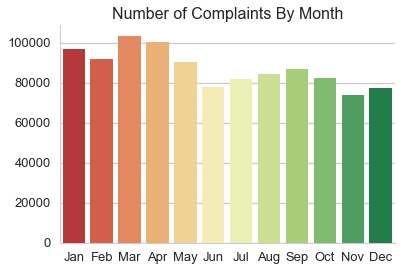

In [11]:
sns.barplot(x='Month', y='Complaints', data=month_df, order=month_order, palette="RdYlGn")
plt.title('Number of Complaints By Month',fontsize=16)
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./../results/monthly_complaints.png', bbox_inches='tight', dpi = 150)
sns.set_style('whitegrid')

Consumer disputed? receive month        No       Yes
0                            Apr  0.827071  0.172929
1                            Aug  0.802121  0.197879
2                            Dec  0.805320  0.194680
3                            Feb  0.814595  0.185405
4                            Jan  0.809955  0.190045
5                            Jul  0.795874  0.204126
6                            Jun  0.792442  0.207558
7                            Mar  0.816702  0.183298
8                            May  0.796872  0.203128
9                            Nov  0.810718  0.189282
10                           Oct  0.803386  0.196614
11                           Sep  0.799456  0.200544


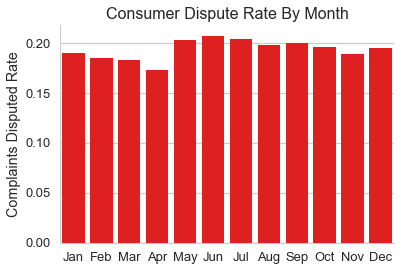

In [12]:
df_dispute_avail = df.dropna(axis=0, subset=['Consumer disputed?'])
df_dispute_month = df_dispute_avail.groupby('receive month')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
print(df_dispute_month)
sns.barplot(x='receive month', y='Yes', data = df_dispute_month, order=month_order, color='red')
plt.ylabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Month',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('Complaints Disputed Rate')
plt.savefig('./../results/month_dispute.png', bbox_inches='tight', dpi = 150)

In [13]:
# consumer complaints by day of the week 

In [14]:

df['receive weekday'] = df['Date received'].apply(lambda x: day_order[x.weekday()])

df_dispute_avail = df.dropna(axis=0, subset=['Consumer disputed?'])
weekday_df = pd.DataFrame(df['receive weekday'].value_counts()).reset_index()
weekday_df.columns = ['WeekDate', 'Complaints']

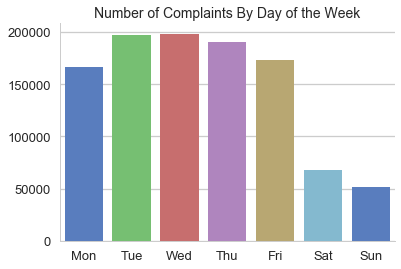

In [15]:
sns.barplot(x='WeekDate', y='Complaints', data=weekday_df, order=day_order, palette='muted')
plt.title('Number of Complaints By Day of the Week',fontsize=14)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./../results/weekly_complaints.png', bbox_inches='tight', dpi = 150)


Consumer disputed? receive weekday        No       Yes
0                              Fri  0.811229  0.188771
1                              Mon  0.803602  0.196398
2                              Sat  0.783844  0.216156
3                              Sun  0.770348  0.229652
4                              Thu  0.813845  0.186155
5                              Tue  0.808454  0.191546
6                              Wed  0.813250  0.186750


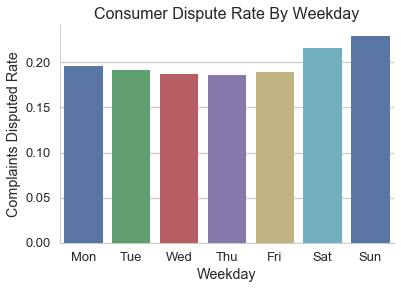

In [16]:
df_dispute_weekday = df_dispute_avail.groupby('receive weekday')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
print(df_dispute_weekday)
sns.barplot(x='receive weekday', y='Yes', data = df_dispute_weekday, order=day_order, palette="deep")
plt.ylabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Weekday',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Weekday')
plt.ylabel('Complaints Disputed Rate')
plt.savefig('./../results/weekday_dispute.png', bbox_inches='tight', dpi = 150)



### Many of the product in the list were changed over the years. For example, credit card, prepaid card were in earlier years but stopped (NaN) after 2017. Instead Credit card or prepaid card feature only appears in later years. Next, I combine some of the products to simplify the product feature. This also makes it more consistent over the years. 

In [17]:
#Many products seem to be replications. Define a function here to fix that.
def categorize_feature(ls):
    new_ls = []
    for i, prod in enumerate(ls):
        if prod in ['Credit reporting', 'Credit reporting, credit repair services, or other personal consumer reports']:
            new_ls.append('Credit reporting, or other consumer reports')
        elif prod in ['Credit card', 'Prepaid card', 'Credit card or prepaid card']:
            new_ls.append('Credit card or prepaid card')
        elif prod in ['Student loan', 'Consumer Loan', 'Vehicle loan or lease', 'Payday loan', 'Payday loan, title loan, or personal loan']:
            new_ls.append('Personal loans')
        elif prod in ['Money transfer, virtual currency, or money service', 'Money transfers', 'Virtual currency']:
            new_ls.append('Money transfer, virtual currency, or money service')
        elif prod in ['Checking or savings account', 'Bank account or service']:
            new_ls.append('Bank account or service')
        else:
            new_ls.append(prod)
    return new_ls

new_list = categorize_feature(df['Product'])

In [18]:
df['Product_new'] = pd.Series(new_list)

In [19]:
# consumer complaints of only mortgage products by day of the week 

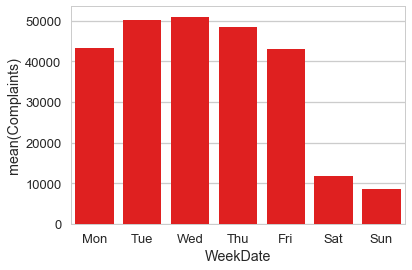

In [20]:

weekday_mortgage_df = pd.DataFrame(df[df['Product_new']=='Mortgage']['receive weekday'].value_counts()).reset_index()
weekday_mortgage_df.columns = ['WeekDate', 'Complaints']
sns.barplot(x='WeekDate', y='Complaints', data=weekday_mortgage_df, order=day_order, color='red')

In [21]:
df['Year'] = df['Date received'].apply(lambda x: x.year)

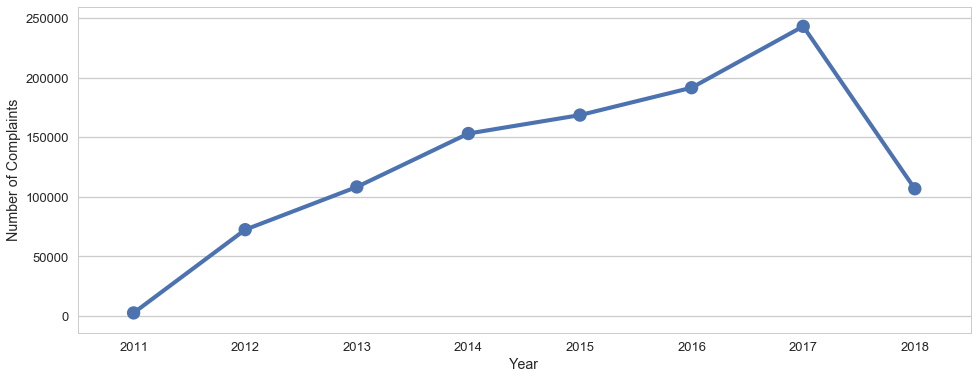

In [22]:
df_year = pd.DataFrame(df['Year'].value_counts().reset_index())
df_year.columns=['Year', 'Complaints']
plt.figure(figsize=(16,6))
sns.pointplot(x='Year', y='Complaints', data=df_year)
plt.ylabel('Number of Complaints')

In [23]:
#how many complaints for each financial product?
df_product = pd.DataFrame(df['Product'].value_counts()).reset_index()
df_product.columns = ['Product','Complaints Count']
df_product

,Product,Complaints Count
0,Mortgage,256461
1,Debt collection,200794
2,Credit reporting,140433
3,"Credit reporting, credit repair services, or o...",119013
4,Credit card,89191
5,Bank account or service,86206
6,Student loan,43662
7,Consumer Loan,31605
8,Credit card or prepaid card,24960
9,Checking or savings account,20716


In [24]:
# The product list above seem overlapping with each other. Check the appearance year of the complaints for each product. 
df.groupby('Product')['Year'].value_counts(normalize=True).unstack()

Year,2011,2012,2013,2014,2015,2016,2017,2018
Product,,,,,,,,
Bank account or service,NaN,0.141661,0.155302,0.170081,0.198826,0.253439,0.080690,NaN
Checking or savings account,NaN,NaN,NaN,NaN,NaN,NaN,0.616142,0.383858
Consumer Loan,NaN,0.062838,0.098624,0.172663,0.249549,0.303813,0.112514,NaN
Credit card,0.014127,0.172136,0.146932,0.156675,0.193966,0.236190,0.079974,NaN
Credit card or prepaid card,NaN,NaN,NaN,NaN,NaN,NaN,0.617147,0.382853
Credit reporting,NaN,0.013337,0.102398,0.208206,0.244052,0.313893,0.118113,NaN
"Credit reporting, credit repair services, or other personal consumer reports",NaN,NaN,NaN,NaN,NaN,NaN,0.616723,0.383277
Debt collection,NaN,NaN,0.055126,0.194966,0.197964,0.201590,0.238917,0.111438
"Money transfer, virtual currency, or money service",NaN,NaN,NaN,NaN,NaN,NaN,0.529851,0.470149


How many complaints per product:
Credit reporting, or other consumer reports           259446
Mortgage                                              256461
Debt collection                                       200794
Credit card or prepaid card                           117970
Bank account or service                               106922
Personal loans                                         91690
Money transfer, virtual currency, or money service     11536
Other financial service                                 1060
dtype: int64


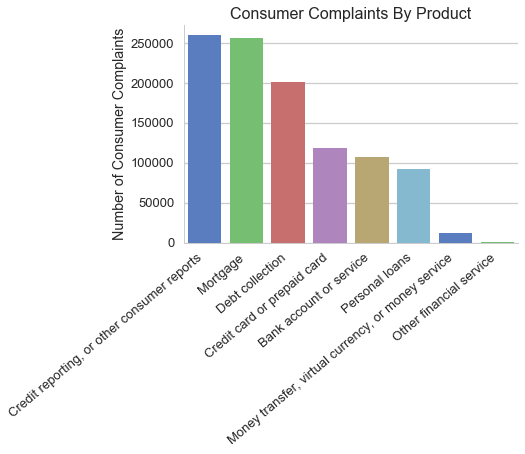

In [25]:
# Value counts of the simplified product list 
product_order = pd.Series(new_list).value_counts().index
print('How many complaints per product:')
print(pd.Series(new_list).value_counts())

sns.countplot(data=df, x='Product_new', order = product_order, palette='muted')
plt.xticks(rotation=40, ha="right")
plt.title('Consumer Complaints By Product',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('')
plt.ylabel('Number of Consumer Complaints')
plt.savefig('./../results/product_complaints.png', bbox_inches='tight', dpi = 150)

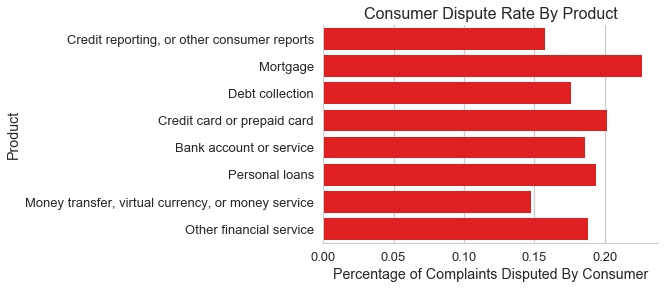

In [26]:
# Percentage of complaints being disputed for the simplified products

df_dispute = df.dropna(axis=0, subset=['Consumer disputed?'])
df_dispute_product = df_dispute.groupby('Product_new')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()

sns.barplot(data=df_dispute_product, y='Product_new', x='Yes',order = product_order, color='red')

#sns.barplot(data=df_dispute, x='Product_new', hue='Consumer disputed?',order = pd.Series(new_list).value_counts().index)

plt.title('Consumer Dispute Rate By Product',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('Product')
plt.savefig('./../results/dispute_product.png', bbox_inches='tight', dpi = 150)

In [27]:
# check the sub-product feature:
df[df['Product_new']=='Mortgage']['Sub-product'].value_counts()

Other mortgage                                86636
Conventional fixed mortgage                   70615
FHA mortgage                                  28546
Conventional adjustable mortgage (ARM)        25381
Conventional home mortgage                    16090
Home equity loan or line of credit            11624
VA mortgage                                    6465
Other type of mortgage                         5900
Reverse mortgage                               2535
Home equity loan or line of credit (HELOC)     2007
Second mortgage                                 662
Name: Sub-product, dtype: int64

In [28]:
# Found code and state name data from https://www.census.gov/geo/reference/ansi_statetables.html
# change the code and state name into dictionary for later use.
state_code= pd.read_csv('./../us states code.csv')
code = state_code['STATE|STUSAB|STATE_NAME|STATENS'].apply(lambda x : x.split('|')[1])
state_name = state_code['STATE|STUSAB|STATE_NAME|STATENS'].apply(lambda x : x.split('|')[2])
state_dict = dict(zip(code, state_name))
state_dict['AA'] = 'American Armed Forces'
state_dict['AE'] = 'American Armed Forces'
state_dict['AP'] = 'American Armed Forces'
state_dict['FM'] = 'Micronesia'
state_dict['MH'] = 'Marshall Islands'
state_dict['PW'] = 'Palau'
state_dict['UNITED STATES MINOR OUTLYING ISLANDS'] = 'UNITED STATES MINOR OUTLYING ISLANDS'

In [29]:
# build a new data frame of the consumer complaints count and products count for each state. 
state_product = df.groupby('State')['Product_new'].value_counts().unstack().reset_index()
state_count = pd.DataFrame(df['State'].value_counts()).reset_index()
state_count.columns = ['State','Count']
state = state_product.merge(state_count, on = 'State')
product_list = state_product.columns[1:]

# find the most complained product for each state. Find the full name of the each state code. 
# Combine the information into one text column that will be used for interactive plotting next.  
state_max_product = []
state_max_product_count = []
for index, row in state_product.iterrows():
    max_product_count = 0
    state_name_i = state_dict[row['State']]
    for i in product_list:
        if row[i] > max_product_count:
            max_product_count = row[i]
            product_name = i
    state_max_product.append(state_name_i+"<br>"+ product_name+": "+str(max_product_count))
state['state_max_product'] = state_max_product 

state.head(5)

,State,Bank account or service,Credit card or prepaid card,"Credit reporting, or other consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Mortgage,Other financial service,Personal loans,Count,state_max_product
0,AA,5.0,3.0,2.0,2.0,NaN,7.0,NaN,3.0,22,American Armed Forces<br>Mortgage: 7.0
1,AE,34.0,42.0,106.0,68.0,11.0,99.0,NaN,61.0,421,"American Armed Forces<br>Credit reporting, or ..."
2,AK,115.0,183.0,285.0,263.0,25.0,220.0,1.0,103.0,1195,"Alaska<br>Credit reporting, or other consumer ..."
3,AL,988.0,966.0,3698.0,2581.0,75.0,2031.0,14.0,1304.0,11657,"Alabama<br>Credit reporting, or other consumer..."
4,AP,15.0,42.0,74.0,64.0,5.0,53.0,NaN,31.0,284,"American Armed Forces<br>Credit reporting, or ..."


In [30]:
plotly_data = dict(type='choropleth',
            colorscale = 'Jet',
            locations = state['State'],
            z = state['Count'],
            locationmode = 'USA-states',
            text = state['state_max_product'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

layout = dict(title = 'Financial Products Consumer Complaints by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [31]:
choromap = go.Figure(data = [plotly_data],layout = layout)
iplot(choromap)

In [32]:
ruraldata = pd.read_excel('./../ruralurbancodes2013.xls', sheetname='Rural-urban Continuum Code 2013')

In [33]:
ruraldata.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...


In [34]:
zipfips = pd.read_csv('./../ZIP-COUNTY-FIPS_2013-12.csv')

In [35]:
zipfips.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36006,Autauga County,AL,1001,H1
1,36003,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [36]:
# merge the zipcode to FIPS data with the FIPS data to rural level data. 
# so that we can use it to merge with the zipcode to rural area data
zip_to_rural = zipfips.merge(ruraldata, how='left', left_on='STCOUNTYFP', right_on='FIPS')[['ZIP','RUCC_2013']]

In [37]:
zip_to_rural.loc[zip_to_rural['ZIP'].isin( np.arange(22200, 22300))]['RUCC_2013'].value_counts().index.values[0]

1.0

In [38]:
# Use the the zip code column of the original data frame, and the above zip to rurality data frame to engineer a new column
# representing how rural the call origin is .
rural = []

df_fillna = df.fillna(0)

for index, row in df_fillna.iterrows():
    
    if row['ZIP code']==0:
        rural.append(0)
    else:
        try: 
            rural.append(zip_to_rural.loc[zip_to_rural['ZIP']== int(row['ZIP code'])]['RUCC_2013'].values[0])
        except IndexError:
            rural.append(0)
        except ValueError: 
            try:
                xlower = int(row['ZIP code'][:-2])*100
                rural_code = zip_to_rural.loc[zip_to_rural['ZIP'].isin( np.arange(xlower, xlower+100))]['RUCC_2013'].value_counts().index.values[0]
                rural.append(rural_code)
            except IndexError:
                rural.append(0)  
            except ValueError:
                rural.append(0)
    

In [39]:
# Add the rurality code to the orignal data frame
df['RuralityCode'] = rural
#zip_to_rural.loc[zip_to_rural['ZIP']== int(df['ZIP code'][50])]['RUCC_2013'].values[0]
#pd.isnull(df['ZIP code'])[:100]
#df.merge(zip_to_rural, how='left', left_on='ZIP code', right_on='ZIP')

In [40]:
# check the value counts of the 'Issue' feature
df['Issue'].value_counts()
df['Issue'].nunique()

166

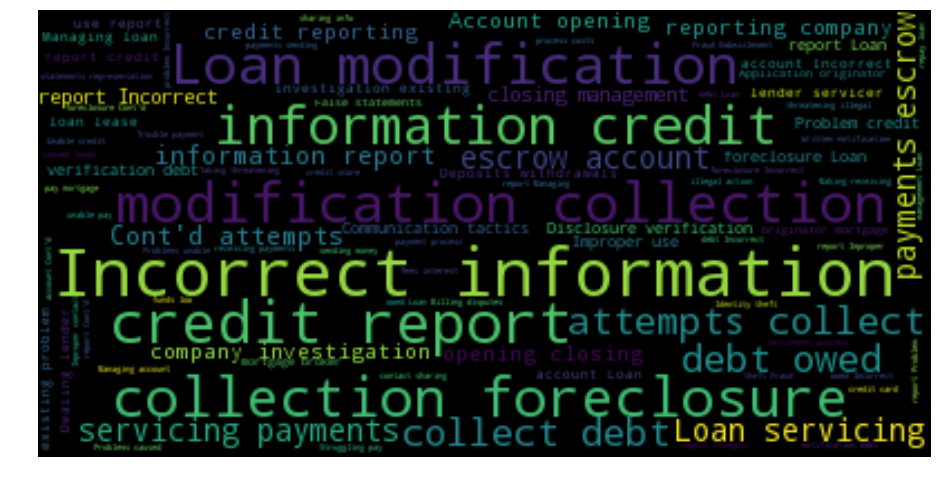

In [41]:
# Word cloud from issue

all_tags = []
for iter_row, row in df.iterrows():
    my_tags = row['Issue'].split(',')
    for tag in my_tags:
        all_tags.append(tag)


#Read the whole text.
text = ' '.join(all_tags)

text
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./../results/issue_wordcloud.png',bbox_inches='tight', dpi = 150)
plt.show()

In [42]:
top_issue = list(pd.DataFrame(df['Issue'].value_counts()[0:30]).index)

df_top_issue = df[df['Issue'].isin(top_issue)]

In [43]:
df_top_issue['Issue'].value_counts().head(5)

Loan modification,collection,foreclosure    112313
Incorrect information on credit report      102687
Loan servicing, payments, escrow account     77337
Incorrect information on your report         66044
Cont'd attempts collect debt not owed        60703
Name: Issue, dtype: int64

In [44]:
top_company = list(pd.DataFrame(df_top_issue.Company.value_counts()[0:30]).index)
df_top_issue_comp = df_top_issue[df_top_issue['Company'].isin(top_company)]

In [45]:
df_top_issue_comp['Company'].value_counts().head(5)

EQUIFAX, INC.                             79345
Experian Information Solutions Inc.       69396
TRANSUNION INTERMEDIATE HOLDINGS, INC.    63791
BANK OF AMERICA, NATIONAL ASSOCIATION     60655
WELLS FARGO & COMPANY                     52452
Name: Company, dtype: int64

In [46]:
# choose categoric columns that we are using for initial test
categoric = df_top_issue_comp[['Product','Issue', 'Company', 'Consumer consent provided?', 'Submitted via', 'Timely response?', 'Company response to consumer']]
target_d = df_top_issue_comp['Consumer disputed?']

In [47]:
df_dummy_cate = pd.get_dummies(data=categoric, drop_first=True)
target_dummy = pd.get_dummies(data=target_d, drop_first=True)
df_dummy = df_dummy_cate.join(target_dummy)

In [48]:
#df_dummy.corr()['Yes']

Consumer disputed?     Company response to consumer        No       Yes
0                                            Closed  0.789717  0.210283
1                           Closed with explanation  0.786701  0.213299
2                       Closed with monetary relief  0.890951  0.109049
3                   Closed with non-monetary relief  0.882035  0.117965
4                                Closed with relief  0.852254  0.147746
5                             Closed without relief  0.718318  0.281682
6                                 Untimely response  0.994382  0.005618


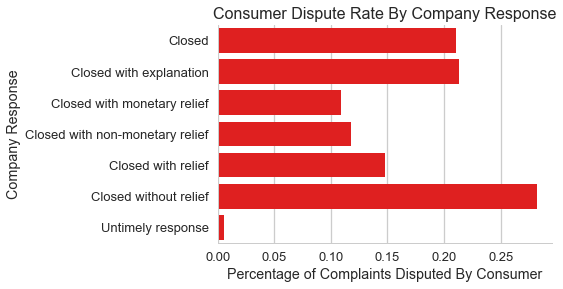

In [49]:

#check how many complaints were disputed for each company response. 
print(df_top_issue_comp.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index())
df_response = df_top_issue_comp.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
df_response.dropna(subset=['Yes'], inplace=True)
sns.barplot(y='Company response to consumer', x='Yes', data = df_response, color='red')
plt.xlabel('Complaint disputed')
plt.title('Consumer Dispute Rate By Company Response',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('Company Response')
plt.savefig('./../results/company_response_dispute.png', bbox_inches='tight', dpi = 150)

In [50]:
# find the values counts of the public response from companies
df_company_response = df.dropna(axis=0, subset=['Company public response'])
print(df_company_response['Company public response'].value_counts())
df_company_response_order = df_company_response['Company public response'].value_counts().index[0:-1]

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            207732
Company chooses not to provide a public response                                                                            52473
Company believes it acted appropriately as authorized by contract or law                                                    49142
Company believes the complaint is the result of a misunderstanding                                                           4678
Company disputes the facts presented in the complaint                                                                        4273
Company believes complaint caused principally by actions of third party outside the control or direction of the company      3402
Company believes complaint is the result of an isolated error                                                                3091
Company can't verify or dispute the facts in the complaint                                

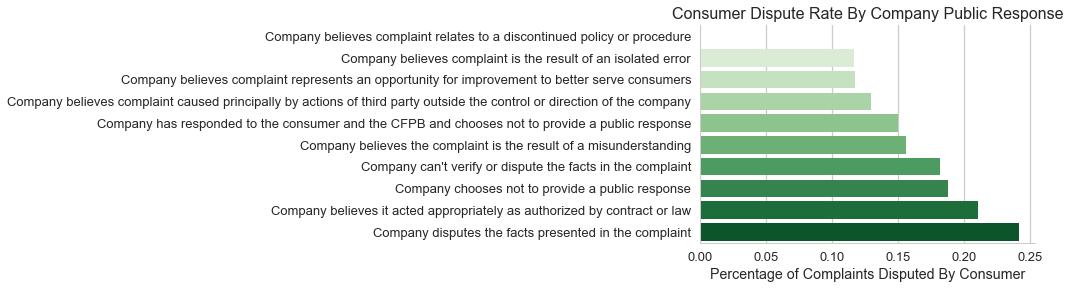

In [51]:
# disputed rate for public company responses
df_company_response_dispute = df_company_response.dropna(axis=0, subset=['Consumer disputed?'])
df_company_response_dispute_rate=df_company_response_dispute.groupby('Company public response')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
# set value to 0 instead of NaN for one input.
df_company_response_dispute_rate.at[2, 'Yes'] =0
sns.barplot(y='Company public response', x='Yes', data = df_company_response_dispute_rate.sort_values('Yes'), palette='Greens')
plt.title('Consumer Dispute Rate By Company Public Response',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('')
plt.savefig('./../results/public_company_response_dispute.png', bbox_inches='tight', dpi = 150)

In [52]:
df['narative_bool'] = pd.isnull(df['Consumer complaint narrative'])

In [53]:
# did narrative or not have an effect on dispute?
df.groupby('Consumer disputed?')['narative_bool'].value_counts(normalize=True).unstack()

narative_bool,False,True
Consumer disputed?,,
No,0.206902,0.793098
Yes,0.241350,0.758650


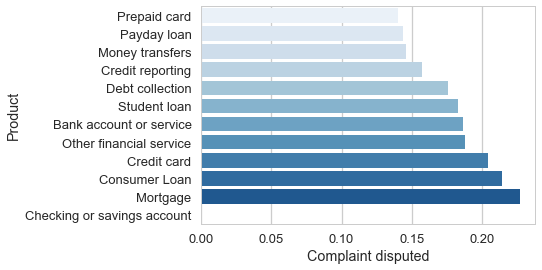

In [54]:
# any product particularly easy to be disputed?
df_product = df.groupby('Product')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()[:-1]
sns.barplot(y='Product', x='Yes', data = df_product.sort_values('Yes'), palette='Blues')
plt.xlabel('Complaint disputed')

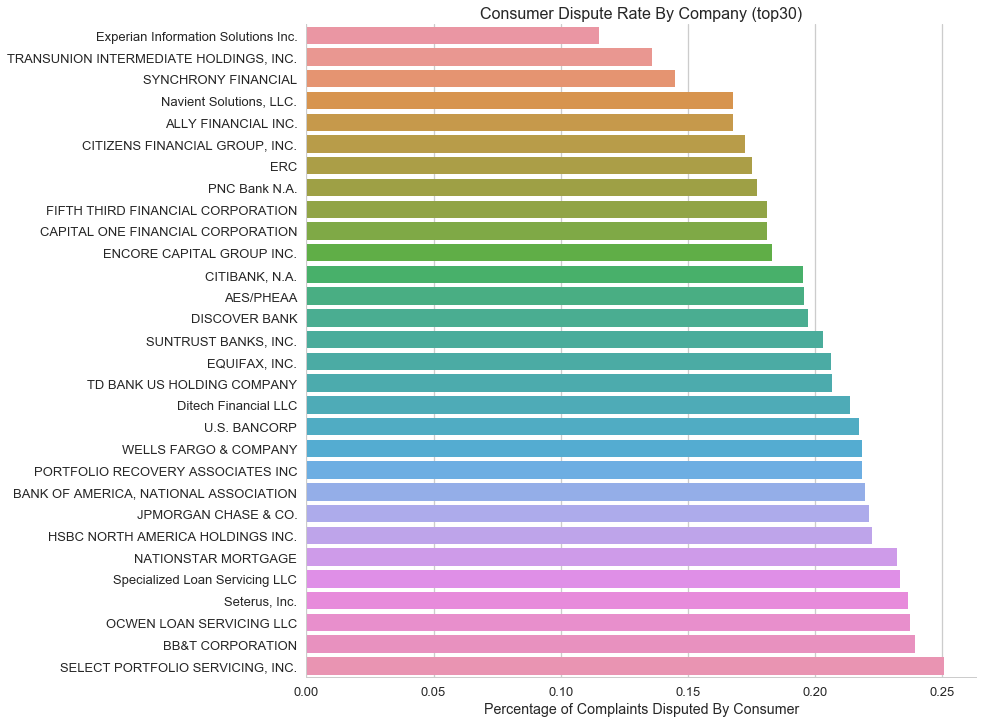

In [55]:
#most appeared companies VS disputed?

df_comp = df_top_issue_comp.groupby('Company')['Consumer disputed?'].value_counts(normalize=True).unstack().reset_index()
plt.figure(figsize=(12,12))
sns.barplot(y='Company', x='Yes', data = df_comp.sort_values('Yes'))
plt.title('Consumer Dispute Rate By Company (top30)',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Percentage of Complaints Disputed By Consumer')
plt.ylabel('')
plt.savefig('./../results/company_dispute.png', bbox_inches='tight', dpi = 150)


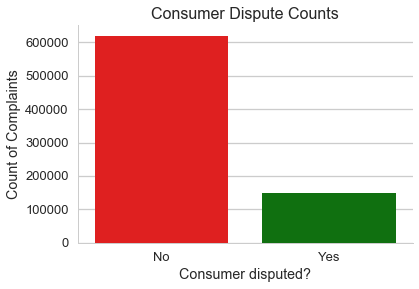

In [56]:
#check how many complaints were disputed. 
sns.countplot(df['Consumer disputed?'], palette=['red','green'])
plt.title('Consumer Dispute Counts',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.ylabel('Count of Complaints')
plt.savefig('./../results/complaint_dispute.png', bbox_inches='tight', dpi = 150)

## Start machine learning 
### Classify whether a complaint will be disputed:

In [58]:
# drop the rows where 'consumer disputed?' is missing
df_dispute = df.dropna(axis=0, subset=['Consumer disputed?'])

In [59]:
df_dispute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768552 entries, 0 to 1045878
Data columns (total 24 columns):
Date received                   768552 non-null datetime64[ns]
Product                         768552 non-null object
Sub-product                     533382 non-null object
Issue                           768552 non-null object
Sub-issue                       313122 non-null object
Consumer complaint narrative    164126 non-null object
Company public response         195710 non-null object
Company                         768552 non-null object
State                           762917 non-null object
ZIP code                        759650 non-null object
Tags                            107966 non-null object
Consumer consent provided?      297947 non-null object
Submitted via                   768552 non-null object
Date sent to company            768552 non-null datetime64[ns]
Company response to consumer    768552 non-null object
Timely response?                768552 non-null

In [60]:
# drop irrelevant columns and the consumer narrative columns (for NLP)
df_dispute_short = df_dispute.drop(['Sub-issue', 'Consumer consent provided?', 'ZIP code','Date received', 'Date sent to company', 'Consumer complaint narrative','Complaint ID'],axis=1)

In [61]:
df_dispute_short_filled = df_dispute_short.fillna(0)
df_dispute_short_filled['narative_bool'].value_counts()

True     604426
False    164126
Name: narative_bool, dtype: int64

In [62]:
# dummy the columns
df_dummies = pd.get_dummies(data=df_dispute_short_filled.drop(['Consumer disputed?'], axis=1), drop_first=True)

In [63]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768552 entries, 0 to 1045878
Columns: 4567 entries, Year to Product_new_Personal loans
dtypes: bool(1), float64(1), int64(1), uint8(4564)
memory usage: 3.3 GB


### Feature selection for categorical columns using $\chi^2$ test. 

In [64]:
# feature selection
# all columns are treated as categorical

p_vals_cate = pd.DataFrame(columns=['Attribute', 'P_value'])
categoric = df_dummies.columns
p_large = []

for col in categoric:
    # Creating cross tabulated data for Chi-square test
    counttable = pd.crosstab(df_dummies[col], df_dispute_short_filled['Consumer disputed?'])
    chi2, p, dof, ex = chi2_contingency(counttable, correction=False)
    p_vals_cate = p_vals_cate.append({'Attribute':col, 'P_value':float(p)}, ignore_index=True)
    if p>0.01:
         p_large.append(col)
    
# Printing p-values of Chi-squared tests, sorted by p-values
print('P-values from Chi-Squared Contingency Tests')
print(p_vals_cate.sort_values('P_value', ascending=False).head(10))

print('info of df before deleting insignificant attributes:')
print(df_dummies.info())

df_dummies_sig  = df_dummies.drop(p_large, axis=1)

print('info of df after:')
print(df_dummies_sig.info())

P-values from Chi-Squared Contingency Tests
                                       Attribute   P_value
3556                      Company_RevSolve, Inc.  0.998790
1504              Company_Duncan Solutions, lnc.  0.995246
3650   Company_SCHOOLSFIRST FEDERAL CREDIT UNION  0.994523
3101           Company_Omni Financial Group, Inc  0.992227
676                     Company_BANK OF THE WEST  0.991717
526   Company_American Financial Resources, Inc.  0.983675
3889       Company_States Recovery Systems, Inc.  0.983230
3489          Company_Receivable Solutions, Inc.  0.978211
2196           Company_Immediate Credit Recovery  0.977878
1567                Company_EdFinancial Services  0.977021
info of df before deleting insignificant attributes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768552 entries, 0 to 1045878
Columns: 4567 entries, Year to Product_new_Personal loans
dtypes: bool(1), float64(1), int64(1), uint8(4564)
memory usage: 3.3 GB
None
info of df after:
<class 'pandas.core.fr

In [65]:
# Identify variables
X = df_dummies_sig
target_map = {'Yes': 1, 'No':0}
y = df_dispute_short['Consumer disputed?'].map(target_map)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


rus = RandomUnderSampler(random_state=41)
X_rus, y_rus = rus.fit_sample(X=X_train, y=y_train)
X_rus_test, y_rus_test = rus.fit_sample(X=X_test, y=y_test)

print('Raw Training Set Percent Yes: {:.1f}%'.format(
    len(y_train[y_train == 1])/len(y_train)*100))
print('Resampled Training Set Percent Yes: {}%'.format(
    len(y_rus[y_rus == 1])/len(y_rus)*100))

Raw Training Set Percent Yes: 19.3%
Resampled Training Set Percent Yes: 50.0%


### Machine learning models of categorical columns

In [66]:
#Random forest classifier parameter optimization:

rf = RandomForestClassifier()
param_grid = {"n_estimators": [80, 100, 120],
              "max_features": [20, 30, 40],
              "max_depth": [5, 10, 20]
              }

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_rus, y_rus)

# Printing the best score from the model
print('Best Score:', grid_rf.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_rf.best_params_
print('Best Parameters:', best_params)

KeyboardInterrupt: 

In [ ]:
#initiate a instance for classifier
rf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf.fit(X_rus, y_rus)

# Predict the labels of the test data: y_pred
y_pred = rf.predict(X_rus_test)

scores_rf_train = cross_val_score(rf, X_rus, y_rus, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_rf_train.mean(), 
                                                                                 scores_rf_train.std()*2))
scores_rf_test = cross_val_score(rf, X_rus_test, y_rus_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(y_rus_test, y_pred))
print('Classification report on the test data:')
print(classification_report(y_rus_test, y_pred))

In [ ]:
clf = LogisticRegression()
parameters = [{'C':[0.1,1,10,100], 'solver':['lbfgs'], 'fit_intercept':[True]},
              {'C':[0.1,1,10,100], 'solver':['liblinear'], 'penalty':['l1', 'l2'], 'fit_intercept':[True]}]
# Instantiating and fitting model through grid search
grid_logR = GridSearchCV(clf, param_grid=parameters)
grid_logR.fit(X_rus, y_rus)

# Printing the best score from the model
print('Best Score:', grid_logR.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_logR.best_params_
print('Best Parameters:', best_params)

#initiate a instance for classifier using the optimized parameters
clf = LogisticRegression(**best_params)

# Fit the classifier to the training data
clf.fit(X_rus, y_rus)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_rus_test)

scores_LR_train = cross_val_score(clf, X_rus, y_rus, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_LR_train.mean(), 
                                                                                 scores_LR_train.std()*2))
scores_LR_test = cross_val_score(clf, X_rus_test, y_rus_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_LR_test.mean(), 
                                                                            scores_LR_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(y_rus_test, y_pred))
print('Classification report on the test data:')
print(classification_report(y_rus_test, y_pred))

## Start natural language processing

#### First check the consumer dispute VS narrative length

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



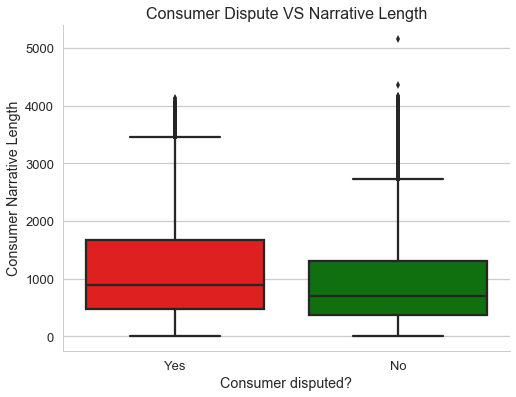

In [73]:
df_narative = df.dropna(axis=0, subset=['Consumer complaint narrative','Consumer disputed?'])
df_narative['NarativeLength'] = [len(nara) for nara in df_narative['Consumer complaint narrative']]
# length of the narrative VS consumer disputed?
plt.figure(figsize=(8,6))
sns.boxplot(data=df_narative, y='NarativeLength', x='Consumer disputed?', order=['Yes', 'No'],palette=['red', 'green'])

plt.title('Consumer Dispute VS Narrative Length',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.ylabel('Consumer Narrative Length')
plt.xlabel('Consumer disputed?')
plt.savefig('./../results/narrativelength_dispute.png', bbox_inches='tight', dpi = 150)


### NLP pre-precessing steps:
    1. Remove all punctuation  
    2. Remove all stopwords  
    3. Returns a list of the cleaned text  
    4. Transform into TFIDF format

In [ ]:
# use this if stop words and other tools are not downloaded already
#nltk.download_shell()

In [75]:
import string
from nltk.corpus import stopwords


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [76]:
len(df_narative['Consumer disputed?'])

164126

In [77]:
df_narative['Consumer complaint narrative'].head(1).apply(text_process)

1    [outdated, information, credit, report, previo...
Name: Consumer complaint narrative, dtype: object

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process, min_df=10, max_df=10000, ngram_range=(2,3)).fit(df_narative['Consumer complaint narrative'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
# Test with the first narrative 
narrative0 = df_narative['Consumer complaint narrative'].head(1)
print(narrative0)
bow0 = bow_transformer.transform([narrative0])

In [ ]:
narrative_bow = bow_transformer.transform(df_narative['Consumer complaint narrative'])

In [ ]:
print('Shape of Sparse Matrix: ', narrative_bow.shape)
print('Amount of Non-Zero occurences: ', narrative_bow.nnz)

In [ ]:
#transform text to TFIDF format

from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

tfidf_transformer = TfidfTransformer().fit(narrative_bow)

tfidf0 = tfidf_transformer.transform(bow0)


narrative_tfidf = tfidf_transformer.transform(narrative_bow)
print(narrative_tfidf.shape)

In [ ]:
#nbm = MultinomialNB().fit(narrative_tfidf, df_narative['Consumer disputed?'])
#print('predicted:', nbm.predict(tfidf0)[0])
#print('expected:',df_narative['Consumer disputed?'].head(1))

In [ ]:
#print('predicted:', nbm.predict(tfidf0)[0])
#print('expected:',df_narative['Consumer disputed?'].head(1))

In [ ]:
df_narative['Consumer disputed?'].map(target_map).value_counts()

In [ ]:
#random under sampling data and train-test split
from sklearn.model_selection import train_test_split

rus = RandomUnderSampler(random_state=41)

X1 = narrative_tfidf
y1 = df_narative['Consumer disputed?'].map(target_map)
X, y = rus.fit_sample(X1, y1)

msg_train, msg_test, label_train, label_test = train_test_split(X, y , test_size=0.3)



#print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

### Classifier using NLP and Naive Bayes model 

In [ ]:
#start a grid search for Naive Bayes classifier
mnb = MultinomialNB()
param_grid = {"alpha": [ 0.01, 0.1, 1, 5, 50],
              
              }

grid_mnb = GridSearchCV(mnb, param_grid=param_grid, cv=5)
grid_mnb.fit(msg_train,label_train)

# Printing the best score from the model
print('Best Score:', grid_mnb.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_mnb.best_params_
print('Best Parameters:', best_params)

In [ ]:
#initiate a instance for classifier
mnb = MultinomialNB(**best_params)

# Fit the classifier to the training data
mnb.fit(msg_train,label_train)

# Predict the labels of the test data: y_pred
y_pred = mnb.predict(msg_test)

scores_mnb_train = cross_val_score(mnb, msg_train,label_train, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_train.mean(), 
                                                                                 scores_mnb_train.std()*2))
scores_mnb_test = cross_val_score(mnb, msg_test, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_test.mean(), 
                                                                                 scores_mnb_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

In [ ]:
df_narrative_short = df_narative.drop(['Sub-issue', 'narative_bool','NarativeLength', 'Consumer consent provided?', 'ZIP code','Date received', 'Date sent to company', 'Consumer complaint narrative','Complaint ID'],axis=1)

#fill nan entries with 0
df_narrative_short_filled = df_narrative_short.fillna(0)
df_narrative_short_filled['Product_new'].value_counts()

In [ ]:
# dummy the columns
df_dummies = pd.get_dummies(data=df_narrative_short_filled.drop(['Consumer disputed?'], axis=1), drop_first=True)
df_dummies.info()

In [ ]:
len(df_narative['Consumer disputed?'])

In [ ]:
# feature selection
# all columns but naratives are treated as categorical

p_vals_cate = pd.DataFrame(columns=['Attribute', 'P_value'])
categoric = df_dummies.columns
p_large = []

for col in categoric:
    # Creating cross tabulated data for Chi-square test
    counttable = pd.crosstab(df_dummies[col], df_narative['Consumer disputed?'])
    chi2, p, dof, ex = chi2_contingency(counttable, correction=False)
    p_vals_cate = p_vals_cate.append({'Attribute':col, 'P_value':float(p)}, ignore_index=True)
    if p>0.05:
         p_large.append(col)
    
# Printing p-values of Chi-squared tests, sorted by p-values
print('P-values from Chi-Squared Contingency Tests')
print(p_vals_cate.sort_values('P_value', ascending=False).head(10))

print('info of df before deleting insignificant attributes:')
print(df_dummies.info())

df_dummies_sig  = df_dummies.drop(p_large, axis=1)

print('info of df after:')
print(df_dummies_sig.info())

In [ ]:
# add engineered feature: narrative length into the df
df_dummies_sig['narative_length'] = df_narative['NarativeLength']

# add the NLP tfidf into the df
df_index = df_dummies_sig.index
df_tfidf = pd.DataFrame(narrative_tfidf.toarray(), index=df_index)

df_dummies_all = pd.concat([df_dummies_sig, df_tfidf], axis=1)

In [ ]:
# Create correlation matrix
#corr_matrix = df_dummies_all.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#df_dummies_choose = df_dummies_all.drop(to_drop, axis=1)

In [ ]:
#to_drop

In [ ]:
#df_dummies_choose.info()

In [ ]:
rus = RandomUnderSampler(random_state=41)

X1 = df_dummies_all
y1 = df_narative['Consumer disputed?'].map(target_map)
X, y = rus.fit_sample(X1,y1)

msg_train, msg_test, label_train, label_test = train_test_split(X, y, test_size=0.3)




In [ ]:
y1.value_counts()

In [ ]:
#start a grid search for Naive Bayes classifier
mnb = MultinomialNB()
param_grid = {"alpha": [ 0.01, 0.1, 1, 5, 50],
              
              }

grid_mnb = GridSearchCV(mnb, param_grid=param_grid, cv=5)
grid_mnb.fit(msg_train,label_train)

# Printing the best score from the model
print('Best Score:', grid_mnb.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_mnb.best_params_
print('Best Parameters:', best_params)

In [ ]:
#initiate a instance for classifier
mnb = MultinomialNB(**best_params)

# Fit the classifier to the training data
mnb.fit(msg_train,label_train)

# Predict the labels of the test data: y_pred
y_pred = mnb.predict(msg_test)

scores_mnb_train = cross_val_score(mnb, msg_train,label_train, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_train.mean(), 
                                                                                 scores_mnb_train.std()*2))
scores_mnb_test = cross_val_score(mnb, msg_test, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_test.mean(), 
                                                                                 scores_mnb_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

In [ ]:
#Random forest classifier parameter optimization:

rf = RandomForestClassifier()
param_grid = {"n_estimators": [80, 100, 120],
              "max_features": [20, 30, 40],
              "max_depth": [5, 10, 20]
              }

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_rus, y_rus)

# Printing the best score from the model
print('Best Score:', grid_rf.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_rf.best_params_
print('Best Parameters:', best_params)

In [ ]:
#initiate a instance for classifier
rf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf.fit(X_rus, y_rus)

# Predict the labels of the test data: y_pred
y_pred = rf.predict(X_rus_test)

scores_rf_train = cross_val_score(rf, X_rus, y_rus, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_rf_train.mean(), 
                                                                                 scores_rf_train.std()*2))
scores_rf_test = cross_val_score(rf, X_rus_test, y_rus_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(y_rus_test, y_pred))
print('Classification report on the test data:')
print(classification_report(y_rus_test, y_pred))